# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis on the preprocessed Telco Customer Churn dataset. Our goal is to gain insights into the data, understand the relationships between variables, and identify any patterns that may help in predicting customer churn.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Preprocessed Dataset

We start by loading the preprocessed dataset. This dataset has been cleaned and prepared in the previous notebook.


In [2]:
# Load the preprocessed dataset
data_path = "../data/processed/cleaned_data.csv"
df = pd.read_csv(data_path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the preprocessed dataset:")
print(df.head())

First few rows of the preprocessed dataset:
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0 -1.277445   
1  5575-GNVDE       1              0        0           0  0.066327   
2  3668-QPYBK       1              0        0           0 -1.236724   
3  7795-CFOCW       1              0        0           0  0.514251   
4  9237-HQITU       0              0        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0 

## Summary Statistics

We print summary statistics of the dataset to understand the distribution of each variable. This step helps us identify any potential outliers or anomalies.


In [5]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
        customerID       gender  SeniorCitizen      Partner   Dependents  \
count         7043  7043.000000    7043.000000  7043.000000  7043.000000   
unique        7043          NaN            NaN          NaN          NaN   
top     7590-VHVEG          NaN            NaN          NaN          NaN   
freq             1          NaN            NaN          NaN          NaN   
mean           NaN     0.504756       0.162147     0.483033     0.299588   
std            NaN     0.500013       0.368612     0.499748     0.458110   
min            NaN     0.000000       0.000000     0.000000     0.000000   
25%            NaN     0.000000       0.000000     0.000000     0.000000   
50%            NaN     1.000000       0.000000     0.000000     0.000000   
75%            NaN     1.000000       0.000000     1.000000     1.000000   
max            NaN     1.000000       1.000000     1.000000     1.000000   

              tenure  PhoneService  MultipleLines  

## Distribution of Churn

We plot the distribution of the target variable `Churn` to see the balance between the classes. This information is crucial for selecting appropriate evaluation metrics and handling imbalanced data.


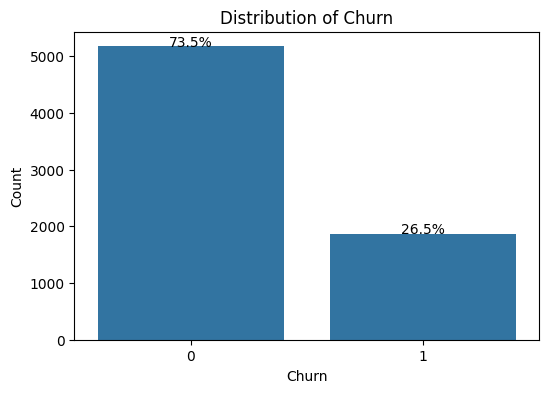

In [7]:
# Plot the distribution of the target variable 'Churn'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

## Correlation Matrix

We visualize the correlation matrix to understand the relationships between different variables. High correlations can indicate multicollinearity, which we need to address in the modeling phase.


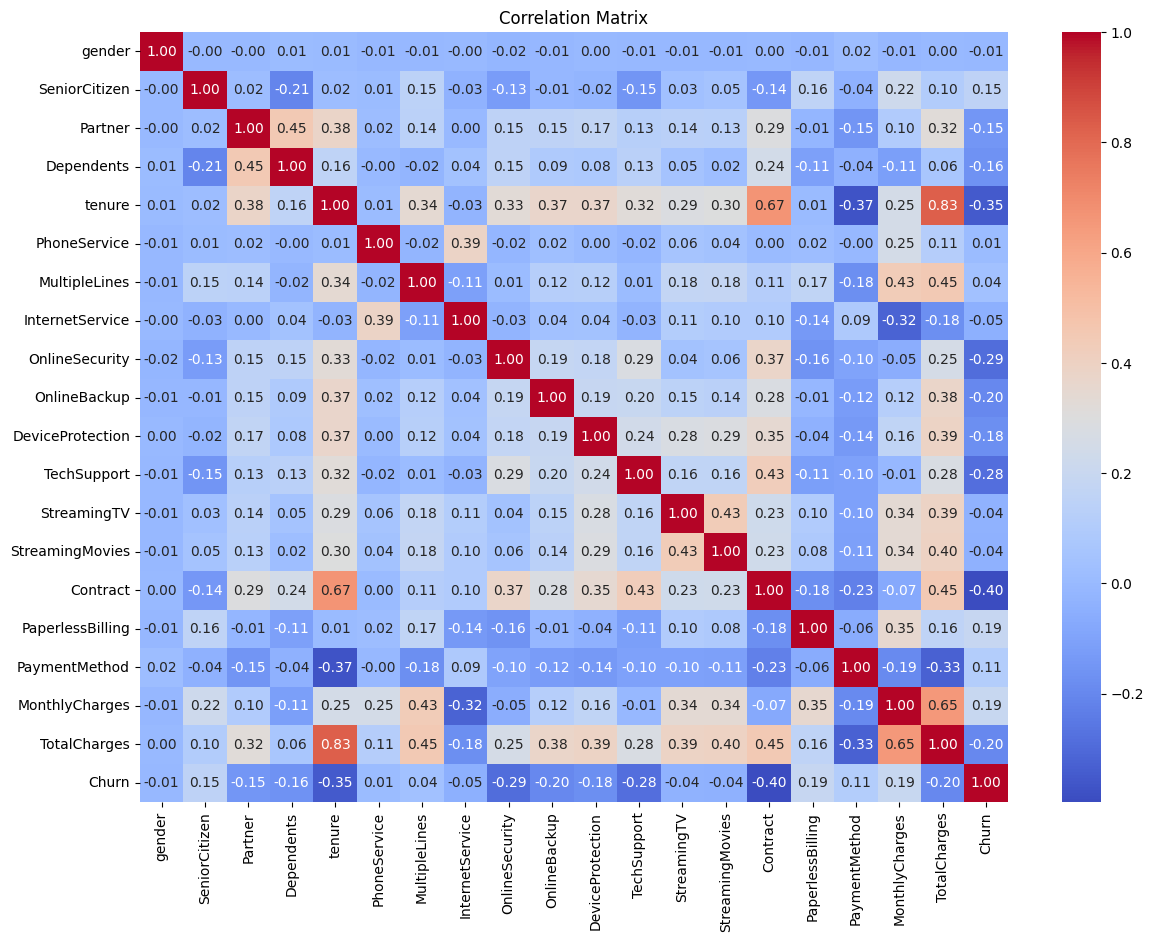

In [9]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Pairplot of Features against Churn

Pairplots help us visualize the relationships between numerical features and the target variable `Churn`. This step can reveal patterns and trends that are not immediately obvious.


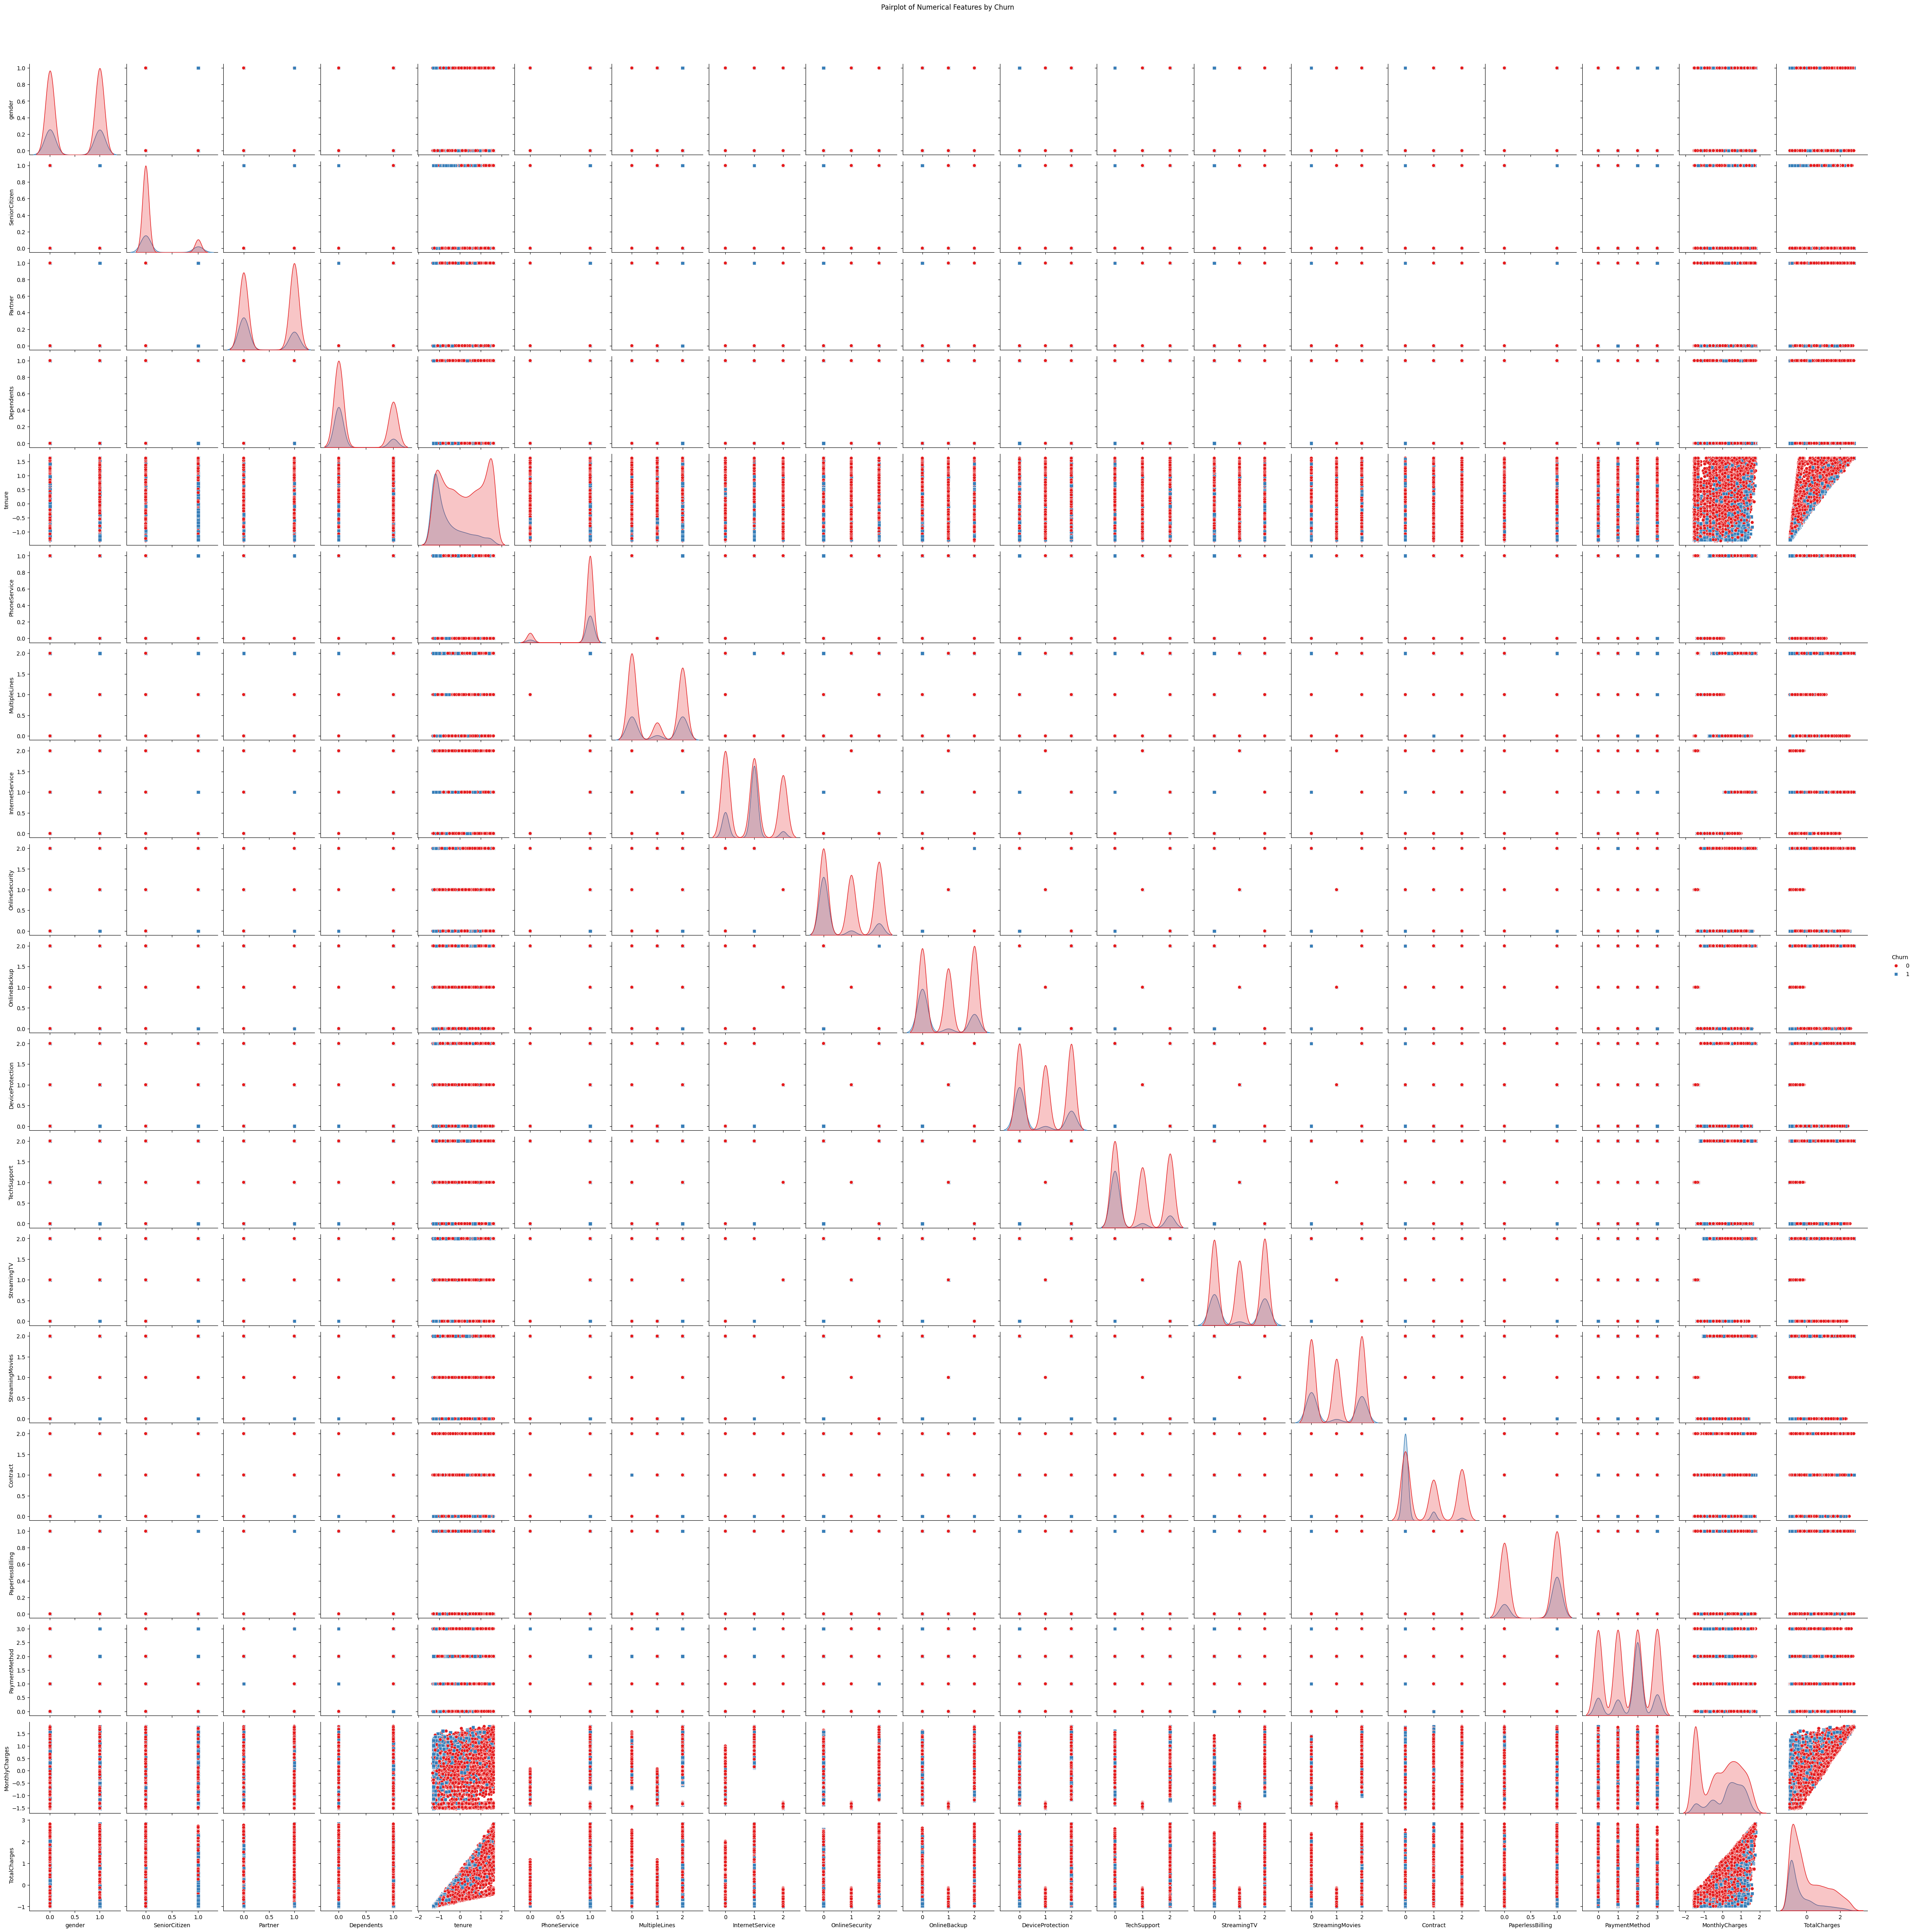

In [12]:
# Plot pairplot of numerical features against 'Churn'
sns.pairplot(df, hue='Churn', diag_kind='kde', palette='Set1', markers=["o", "s"])
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

## Boxplots of Numerical Features by Churn

Boxplots allow us to compare the distribution of numerical features for the churn and non-churn classes. This step helps us understand how these features vary with the target variable.


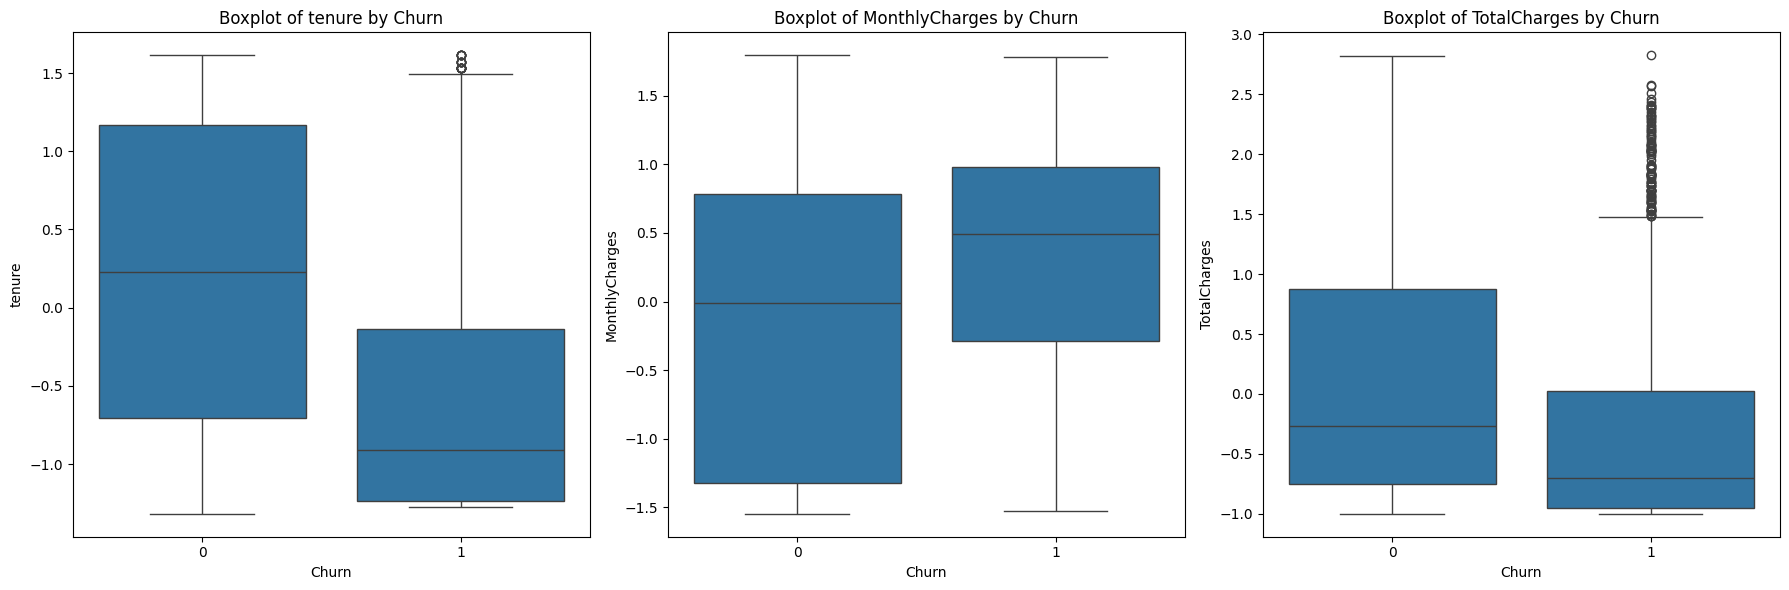

In [13]:
# Plot boxplots of numerical features by 'Churn'
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')

plt.tight_layout()
plt.show()


## Countplots of Categorical Features by Churn

We create countplots to analyze the distribution of categorical features across the churn and non-churn classes. This step provides insights into how categorical variables influence customer churn.
